In [1]:
from pymavlink import mavutil
import numpy as np
import matplotlib.pyplot as plt; plt.ion()

In [2]:
logfile = '/home/ntlhui/Downloads/00000024.BIN'
mavmaster = mavutil.mavlink_connection(logfile)

In [3]:
acc = {}
acc['x'] = []
acc['y'] = []
acc['z'] = []
acc['t'] = []
gyr = {}
gyr['r'] = []
gyr['p'] = []
gyr['y'] = []
rcout = {}
rcout['1'] = []
rcout['2'] = []
rcout['3'] = []
rcout['4'] = []
rcout['t'] = []
rcin = {}
rcin['Ail'] = []
rcin['Ele'] = []
rcin['Thr'] = []
rcin['Rud'] = []
rcin['t'] = []
att = {}
att['roll'] = []
att['pitch'] = []
att['yaw'] = []
att['desroll'] = []
att['despitch'] = []
att['desyaw'] = []
att['t'] = []
bat = {}
bat['curr'] = []
bat['volt'] = []
bat['t'] = []
ahr2 = {}
ahr2['alt'] = []
ahr2['t'] = []
mesg = {}
mesg['msg'] = []
mesg['t'] = []
nkf1 = {}
nkf1['vn'] = []
nkf1['ve'] = []
nkf1['vd'] = []
nkf1['t'] = []
gps = {}
gps['spd'] = []
gps['t'] = []
mode = {}
mode['Mode'] = []
mode['t'] = []
ev = {}
ev['ev'] = []
ev['t'] = []
ctun = {}
ctun['ThrIn'] = []
ctun['ThrOut'] = []
ctun['DesAlt'] = []
ctun['Alt'] = []
ctun['t'] = []
takeoffs = []
landings = []

In [4]:
message_types = set()
mavmaster.rewind()
while True:
    msg = mavmaster.recv_match(blocking=False)
    if msg is None:
        break
    if msg.get_type() == 'IMU':
        acc['x'].append(msg.to_dict()['AccX'])
        acc['y'].append(msg.to_dict()['AccY'])
        acc['z'].append(msg.to_dict()['AccZ'])
        acc['t'].append(msg.to_dict()['TimeUS'])
        gyr['r'].append(msg.to_dict()['GyrX'])
        gyr['p'].append(msg.to_dict()['GyrY'])
        gyr['y'].append(msg.to_dict()['GyrZ'])
    elif msg.get_type() == 'RCOU':
        rcout['1'].append(msg.to_dict()['C1'])
        rcout['2'].append(msg.to_dict()['C2'])
        rcout['3'].append(msg.to_dict()['C3'])
        rcout['4'].append(msg.to_dict()['C4'])
        rcout['t'].append(msg.to_dict()['TimeUS'])
    elif msg.get_type() == 'ATT':
        att['roll'].append(msg.to_dict()['Roll'])
        att['pitch'].append(msg.to_dict()['Pitch'])
        att['yaw'].append(msg.to_dict()['Yaw'])
        att['desroll'].append(msg.to_dict()['DesRoll'])
        att['despitch'].append(msg.to_dict()['DesPitch'])
        att['desyaw'].append(msg.to_dict()['DesYaw'])
        att['t'].append(msg.to_dict()['TimeUS'])
    elif msg.get_type() == 'BAT':
        bat['curr'].append(msg.to_dict()['Curr'])
        bat['volt'].append(msg.to_dict()['Volt'])
        bat['t'].append(msg.to_dict()['TimeUS'])
    elif msg.get_type() == 'AHR2':
        ahr2['alt'].append(msg.to_dict()['Alt'])
        ahr2['t'].append(msg.to_dict()['TimeUS'])
    elif msg.get_type() == 'MSG':
        mesg['msg'].append(msg.to_dict()['Message'])
        mesg['t'].append(msg.to_dict()['TimeUS'])
    elif msg.get_type() == 'NKF1':
        nkf1['vn'].append(msg.to_dict()['VN'])
        nkf1['ve'].append(msg.to_dict()['VE'])
        nkf1['vd'].append(msg.to_dict()['VD'])
        nkf1['t'].append(msg.to_dict()['TimeUS'])
    elif msg.get_type() == 'GPS':
        gps['spd'].append(msg.to_dict()['Spd'])
        gps['t'].append(msg.to_dict()['TimeUS'])
    elif msg.get_type() == 'RCIN':
        rcin['Ail'].append(msg.to_dict()['C1'])
        rcin['Ele'].append(msg.to_dict()['C2'])
        rcin['Thr'].append(msg.to_dict()['C3'])
        rcin['Rud'].append(msg.to_dict()['C4'])
        rcin['t'].append(msg.to_dict()['TimeUS'])
    elif msg.get_type() == 'MODE':
        mode['Mode'].append(msg.to_dict()['Mode'])
        mode['t'].append(msg.to_dict()['TimeUS'])
    elif msg.get_type() == 'EV':
        ev['ev'].append(msg.to_dict()['Id'])
        ev['t'].append(msg.to_dict()['TimeUS'])
        if msg.to_dict()['Id'] == 10:
            takeoffs.append(msg.to_dict()['TimeUS'])
        if msg.to_dict()['Id'] == 11:
            landings.append(msg.to_dict()['TimeUS'])
    elif msg.get_type() == 'CTUN':
        ctun['ThrIn'].append(msg.to_dict()['ThI'])
        ctun['ThrOut'].append(msg.to_dict()['ThO'])
        ctun['DesAlt'].append(msg.to_dict()['DAlt'])
        ctun['Alt'].append(msg.to_dict()['Alt'])
        ctun['t'].append(msg.to_dict()['TimeUS'])
    message_types.add(msg.get_type())
# message_types

In [5]:
acc['x'] = np.array(acc['x'])/10
acc['y'] = np.array(acc['y'])/10
acc['z'] = np.array(acc['z'])/10
gyr['r'] = np.array(gyr['r'])
gyr['p'] = np.array(gyr['p'])
gyr['y'] = np.array(gyr['y'])
acc['tot'] = np.linalg.norm(np.block([[acc['x']], [acc['y']], [acc['z'] + 1]]), axis=0)
acc['t'] = np.array(acc['t']) / 1e6
rcout['1'] = np.array(rcout['1'])
rcout['2'] = np.array(rcout['2'])
rcout['3'] = np.array(rcout['3'])
rcout['4'] = np.array(rcout['4'])
rcout['t'] = np.array(rcout['t']) / 1e6
rcin['Ail'] = np.array(rcin['Ail'])
rcin['Ele'] = np.array(rcin['Ele'])
rcin['Thr'] = np.array(rcin['Thr'])
rcin['Rud'] = np.array(rcin['Rud'])
rcin['t'] = np.array(rcin['t']) / 1e6
att['roll'] = np.array(att['roll'])
att['pitch'] = np.array(att['pitch'])
att['yaw'] = np.array(att['yaw'])
att['desroll'] = np.array(att['desroll'])
att['despitch'] = np.array(att['despitch'])
att['desyaw'] = np.array(att['desyaw'])
att['t'] = np.array(att['t']) / 1e6
bat['curr'] = np.array(bat['curr'])
bat['volt'] = np.array(bat['volt'])
bat['t'] = np.array(bat['t']) / 1e6
ahr2['alt'] = np.array(ahr2['alt'])
ahr2['t'] = np.array(ahr2['t']) / 1e6
nkf1['vn'] = np.array(nkf1['vn'])
nkf1['vd'] = np.array(nkf1['ve'])
nkf1['vd'] = np.array(nkf1['vd'])
nkf1['t'] = np.array(nkf1['t']) / 1e6
gps['spd'] = np.array(gps['spd'])
gps['t'] = np.array(gps['t']) / 1e6
mode['Mode'] = [mavutil.mode_string_acm(m) for m in mode['Mode']]
mode['t'] = np.array(mode['t']) / 1e6
ev['t'] = np.array(ev['t']) / 1e6
ctun['ThrIn'] = np.array(ctun['ThrIn'])
ctun['ThrOut'] = np.array(ctun['ThrOut'])
ctun['DesAlt'] = np.array(ctun['DesAlt'])
ctun['Alt'] = np.array(ctun['Alt'])
ctun['t'] = np.array(ctun['t']) / 1e6

In [6]:
bat['pow'] = bat['curr'] * bat['volt']
mesg['msg']
wp = {}
wp['wp'] = [msg for msg in mesg['msg'] if msg.startswith('Reached command')]
wp['t'] = [mesg['t'][i] for i in range(len(mesg['msg'])) if mesg['msg'][i].startswith('Reached command')]
gps['t'][-1]
mode['Mode'][-1]

'AUTO'

In [7]:
for i in range(len(takeoffs)):
    print("Takeoff %d at %.3f, Landed at %.3f" % (i, takeoffs[i] / 1e6, landings[i] / 1e6))
flights = [(takeoffs[i] / 1e6, landings[i] / 1e6) for i in range(len(takeoffs))]

Takeoff 0 at 535.803, Landed at 945.184


# Visualization
Last leg starts at 927.792 seconds after boot

Start of loss of attitude control begins at 940 seconds after boot.

Ground impact occurs 941.994458 seconds after boot

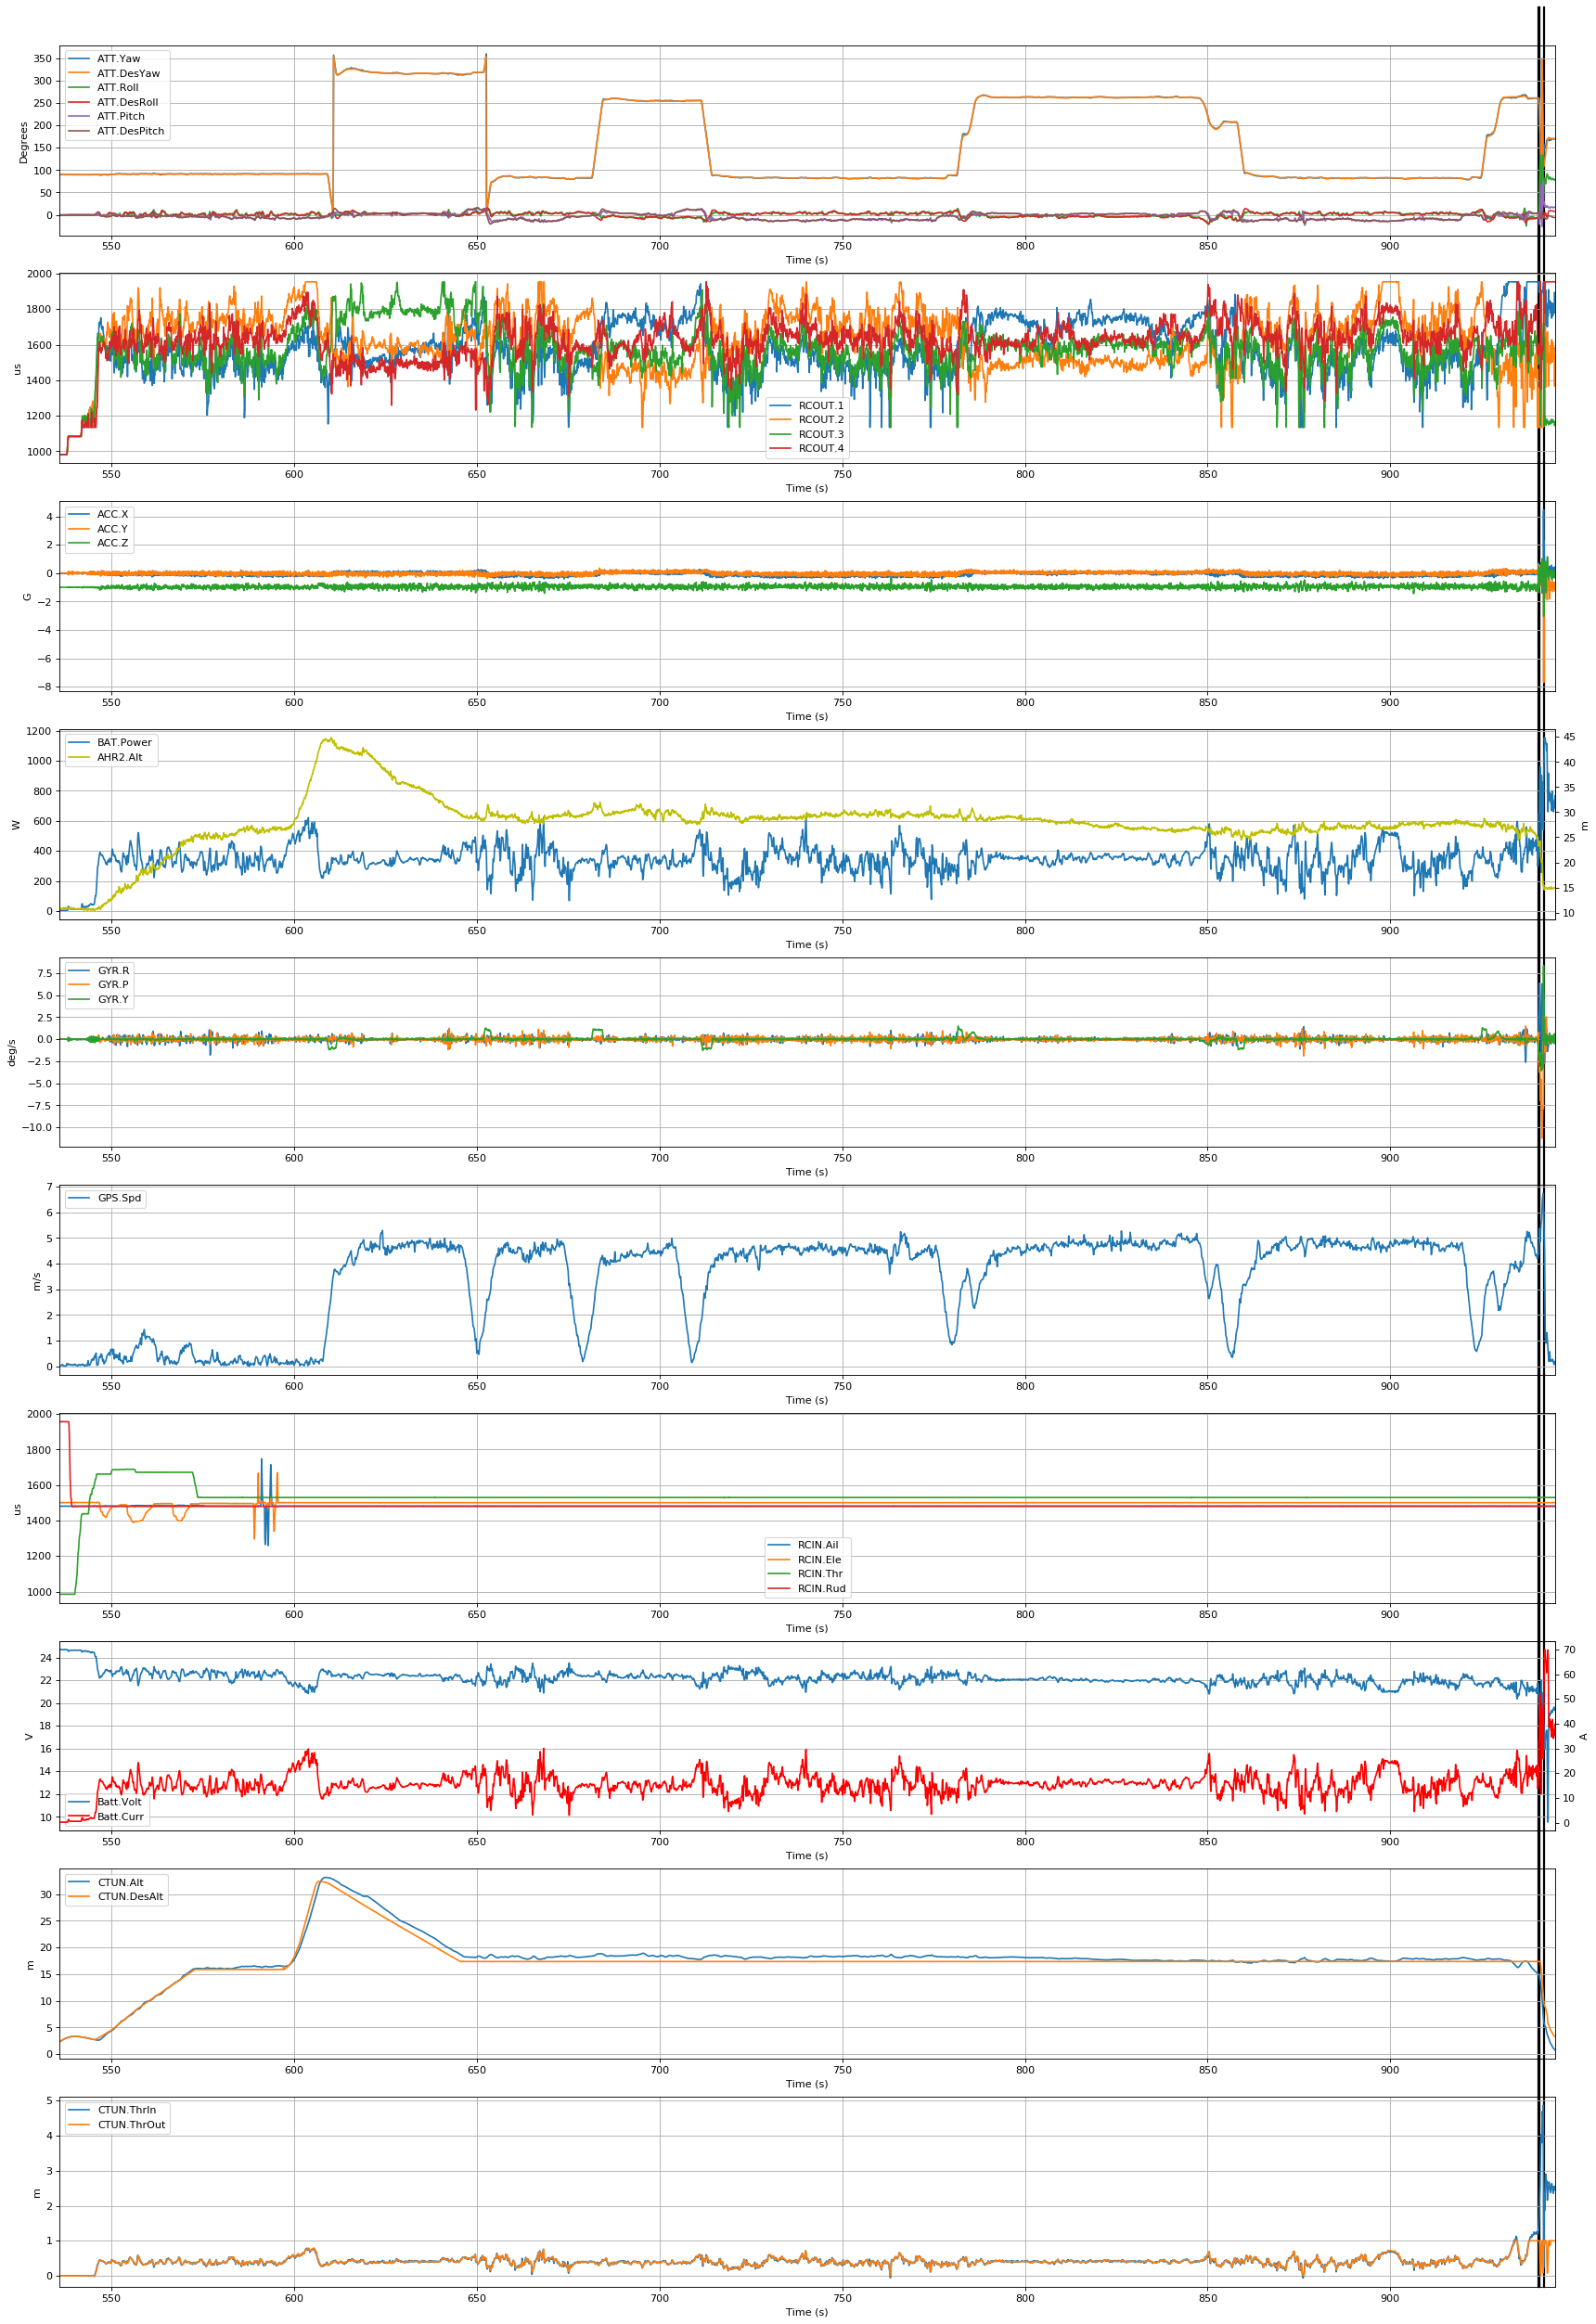

In [11]:
xlims = flights[0]
# xlims = (930, 942.5)
nrows = 10
fig, ax = plt.subplots(nrows, 1, figsize=(26, nrows * 4), dpi=80)

ax[0].plot(att['t'], att['yaw'], label='ATT.Yaw')
ax[0].plot(att['t'], att['desyaw'], label='ATT.DesYaw')
ax[0].plot(att['t'], att['roll'], label='ATT.Roll')
ax[0].plot(att['t'], att['desroll'], label='ATT.DesRoll')
ax[0].plot(att['t'], att['pitch'], label='ATT.Pitch')
ax[0].plot(att['t'], att['despitch'], label='ATT.DesPitch')
ax[0].set_xlim(xlims)
ax[0].legend()
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Degrees')
ax[0].grid()

ax[1].plot(rcout['t'], rcout['1'], label='RCOUT.1')
ax[1].plot(rcout['t'], rcout['2'], label='RCOUT.2')
ax[1].plot(rcout['t'], rcout['3'], label='RCOUT.3')
ax[1].plot(rcout['t'], rcout['4'], label='RCOUT.4')
ax[1].set_xlim(xlims)
ax[1].legend()
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('us')
ax[1].grid()

ax2 = ax[3].twinx()
p1, = ax[3].plot(bat['t'], bat['pow'], label='BAT.Power')
ax[3].set_ylabel('W')
p2, = ax2.plot(ahr2['t'], ahr2['alt'], '-y', label='AHR2.Alt')
ax2.set_ylabel('m')
lines = [p1, p2]
ax[3].set_xlim(xlims)
ax[3].set_xlabel('Time (s)')
ax[3].grid()
ax[3].legend(lines, [l.get_label() for l in lines])

ax[2].plot(acc['t'], acc['x'], label='ACC.X')
ax[2].plot(acc['t'], acc['y'], label='ACC.Y')
ax[2].plot(acc['t'], acc['z'], label='ACC.Z')
ax[2].set_xlim(xlims)
ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('G')
ax[2].grid()
ax[2].legend()

ax[4].plot(acc['t'], gyr['r'], label='GYR.R')
ax[4].plot(acc['t'], gyr['p'], label='GYR.P')
ax[4].plot(acc['t'], gyr['y'], label='GYR.Y')
ax[4].set_xlim(xlims)
ax[4].set_xlabel('Time (s)')
ax[4].set_ylabel('deg/s')
ax[4].grid()
ax[4].legend()

ax[5].plot(gps['t'], gps['spd'], label='GPS.Spd')
ax[5].set_xlim(xlims)
ax[5].set_xlabel('Time (s)')
ax[5].set_ylabel('m/s')
ax[5].grid()
ax[5].legend()

ax[6].plot(rcin['t'], rcin['Ail'], label='RCIN.Ail')
ax[6].plot(rcin['t'], rcin['Ele'], label='RCIN.Ele')
ax[6].plot(rcin['t'], rcin['Thr'], label='RCIN.Thr')
ax[6].plot(rcin['t'], rcin['Rud'], label='RCIN.Rud')
ax[6].set_xlim(xlims)
ax[6].set_xlabel('Time (s)')
ax[6].set_ylabel('us')
ax[6].grid()
ax[6].legend()

p1, = ax[7].plot(bat['t'], bat['volt'], label='Batt.Volt')
ax1 = ax[7].twinx()
p2, = ax1.plot(bat['t'], bat['curr'], '-r', label='Batt.Curr')
ax1.set_ylabel('A')
lines = [p1, p2]
ax[7].set_xlim(xlims)
ax[7].set_xlabel('Time (s)')
ax[7].set_ylabel('V')
ax[7].grid()
ax[7].legend(lines, [l.get_label() for l in lines])

ax[8].plot(ctun['t'], ctun['Alt'], label='CTUN.Alt')
ax[8].plot(ctun['t'], ctun['DesAlt'], label='CTUN.DesAlt')
ax[8].set_xlim(xlims)
ax[8].set_xlabel('Time (s)')
ax[8].set_ylabel('m')
ax[8].grid()
ax[8].legend()

ax[9].plot(ctun['t'], ctun['ThrIn'], label='CTUN.ThrIn')
ax[9].plot(ctun['t'], ctun['ThrOut'], label='CTUN.ThrOut')
ax[9].set_xlim(xlims)
ax[9].set_xlabel('Time (s)')
ax[9].set_ylabel('m')
ax[9].grid()
ax[9].legend()

ground_impact_t = acc['t'][np.argmax(acc['tot'])]
loa_t = 940.49393
unrecoverable_t = att['t'][att['roll'] > 30][0]

for axis in ax:
    axis.axvline(x=ground_impact_t, ymin=0, ymax=1.2, c="black", linewidth=2, zorder=0, clip_on=False)
    axis.axvline(x=loa_t, ymin=0, ymax=1.2, c="black", linewidth=2, zorder=0, clip_on=False)
    axis.axvline(x=unrecoverable_t, ymin=0, ymax=1.2, c="black", linewidth=2, zorder=0, clip_on=False)

plt.show()

# Crash Analysis

Prior to the crash, the aircraft is at an altitude of 65 ft MSL, approximately 19 ft AGL, travelling 5 m/s west along a west facing slope.  This leg begins at 927.792 seconds.  3 seconds prior to the crash at 939 s, the #1 motor is maxed out at 100% throttle.  This is confirmed with power draw increasing at the same time from 200 W to 400 W, which is what we would expect for a motor going all out.  The aircraft hits a patch of turbulence at 937 s, but recovers to what appears to be stable flight.  At 940 s, the controller begins to spin down the #2 motor, reaching idle by 940.5 s.  At this point, we see the yaw of the aircraft begin to diverge from its setpoint, yawing left.  At 940.55 s, there is a jump in x and z axis acceleration, with z axis acceleration reaching +0.5 G, and x axis acceleration reaching +0.5 G. We see the controller begin to spin down the #1 motor as well at 940.6 s, and the roll and pitch begin to diverge from their setpoints.  Immediately after this, power draw increases to 600 W by 940.7 s  The copter rolls right beyond 30 degrees at 940.8 s.  Ground impact is recorded at 942 s.